<a href="https://colab.research.google.com/github/rizkiar00/Bagging-Berbasis-Naive-Bayes/blob/master/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import

In [1]:
!git clone https://github.com/rizkiar00/Bagging-Berbasis-Naive-Bayes

Cloning into 'Bagging-Berbasis-Naive-Bayes'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

###AMBIL DATA TRAIN

Kelas:
 1.0    220
2.0     78
Name: Kelas, dtype: int64


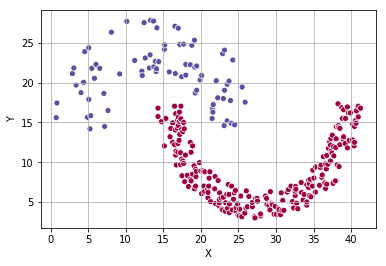

In [85]:
train = np.genfromtxt('Bagging-Berbasis-Naive-Bayes/TrainsetTugas4ML.csv', delimiter=',', skip_header=1)
dftrain = pd.DataFrame(data=train,columns=['X','Y','Kelas'])
print('Kelas:\n', dftrain['Kelas'].value_counts())
ax = sns.scatterplot(x=dftrain['X'], y=dftrain['Y'], data=dftrain,hue='Kelas',palette="Spectral",legend=False)
ax.grid(True)

In [88]:
dftrain.head(5)

,X,Y,Kelas
0,0.75,15.60,2.0
1,0.85,17.45,2.0
2,2.90,21.15,2.0
3,3.10,21.85,2.0
4,3.40,19.70,2.0


###LAKUKAN TRAINING

*   JUMLAH MODEL DAN JUMLAH DATA YANG DIPAKAI TRAINING BEBAS
*   LAKUKAN TESTING KE SISA DATA YANG BELUM DIGUNAKAN UNTUK TRAINING
*   BAGGING MELAKUKAN VOTING UNTUK TIAP MODEL, KELAS MANAKAH SUATU DATA MASUK
*   LIHAT AKURASINYA




In [90]:
#Bagian ini milih random datatrain (satu data bisa dipilih lebih dari satu kali) buat di training
jumlahmodel = 21
datatrainingdiambil = 30
array = np.arange(0,dftrain.shape[0])
random = np.random.randint(dftrain.shape[0], size=(jumlahmodel,datatrainingdiambil))
#test itu data training yang gak kepilih/kepake buat training. jadi test bakal dipake buat testing dan cari akurasinya
test = [i for i in array if i not in random]
print("Jumlah Sisa: ",len(test))
Xtrainrandom = []
Ytrainrandom = []
for i in range(jumlahmodel):
  Ytrainrandom.append(np.delete(train[random[i]], (0,1), axis=1)) 
  Xtrainrandom.append(np.delete(train[random[i]], 2, axis=1)) 

#bagian ini buat bikin model naive bayesnya
objmodel = list()
for i in range(jumlahmodel):
    objmodel.append(GaussianNB().fit(Xtrainrandom[i],Ytrainrandom[i].ravel()))

#bagian ini buat cek akurasi tiap model naive bayes
Ytestsisa = np.delete(train[test], (0,1), axis=1)
Xtestsisa = np.delete(train[test], 2, axis=1)
Ytestpredict = []
for i in range(jumlahmodel):
  Ytestpredict.append(objmodel[i].predict(Xtestsisa))
  print("Akurasi Model {}: {}".format(i,np.mean(Ytestpredict[i] == Ytestsisa)))

#bagian ini buat cek akurasi bagging dari model2 naivebayes dengan melakukan voting
BaggingYtestpredict = []
for i in range(len(Ytestsisa)):
  votebagging = np.array(Ytestpredict)[:,i]
  votebagging = votebagging.astype(int)
  counts = np.bincount(votebagging)
  BaggingYtestpredict.append(np.argmax(counts))
print("Akurasi Model Bagging: {}".format(np.mean(BaggingYtestpredict == np.transpose(Ytestsisa))))

Jumlah Sisa:  33
Akurasi Model 0: 0.5555555555555556
Akurasi Model 1: 0.6060606060606061
Akurasi Model 2: 0.5656565656565656
Akurasi Model 3: 0.5757575757575758
Akurasi Model 4: 0.5555555555555556
Akurasi Model 5: 0.5555555555555556
Akurasi Model 6: 0.5959595959595959
Akurasi Model 7: 0.5656565656565656
Akurasi Model 8: 0.5555555555555556
Akurasi Model 9: 0.5555555555555556
Akurasi Model 10: 0.5656565656565656
Akurasi Model 11: 0.5959595959595959
Akurasi Model 12: 0.5555555555555556
Akurasi Model 13: 0.5858585858585859
Akurasi Model 14: 0.5555555555555556
Akurasi Model 15: 0.5555555555555556
Akurasi Model 16: 0.5555555555555556
Akurasi Model 17: 0.5454545454545454
Akurasi Model 18: 0.5757575757575758
Akurasi Model 19: 0.5656565656565656
Akurasi Model 20: 0.5858585858585859
Akurasi Model Bagging: 1.0


In [91]:
confusion_df = pd.DataFrame(confusion_matrix(Ytestsisa,BaggingYtestpredict),
             columns=["Predicted Class " + str(class_name) for class_name in [1.0,2.0]],
             index = ["Class " + str(class_name) for class_name in [1.0,2.0]])
print(confusion_df)

           Predicted Class 1.0  Predicted Class 2.0
Class 1.0                   22                    0
Class 2.0                    0                   11


###LAKUKAN TESTING UNTUK TESTSETTUGAS4ML.CSV

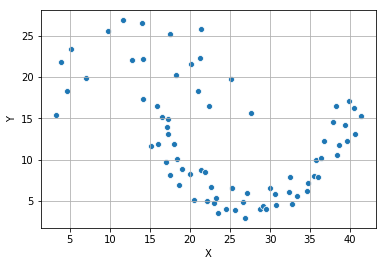

In [109]:
datatest = np.genfromtxt('Bagging-Berbasis-Naive-Bayes/TestsetTugas4ML.csv', delimiter=',', skip_header=1,usecols = (0,1))
dftest = pd.DataFrame(data=datatest,columns=['X','Y'])
ax = sns.scatterplot(x=dftest['X'], y=dftest['Y'], data=dftest,legend=False)
ax.grid(True)

In [110]:
dftest.head(n=5)

,X,Y
0,3.30,15.45
1,3.90,21.85
2,4.60,18.25
3,5.20,23.40
4,7.05,19.90


In [0]:
Ydatatestpredict = []
for i in range(jumlahmodel):
  Ydatatestpredict.append(objmodel[i].predict(datatest))

BaggingDataTestpredict = []
for i in range(len(datatest)):
  votebagging = np.array(Ydatatestpredict)[:,i]
  votebagging = votebagging.astype(int)
  counts = np.bincount(votebagging)
  BaggingDataTestpredict.append(np.argmax(counts))
BaggingDataTestpredict
np.savetxt("TebakanTugas4.csv", BaggingDataTestpredict, delimiter=",")

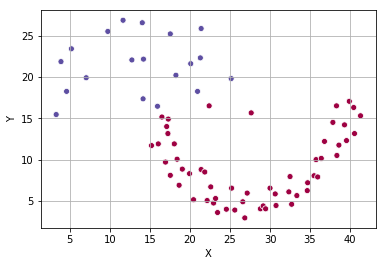

In [119]:
KelasTest = pd.DataFrame(data=BaggingDataTestpredict,columns=['Kelas'])
dftest = dftest.assign(Kelas=KelasTest.values)
ax = sns.scatterplot(x=dftest['X'], y=dftest['Y'], data=dftest,hue='Kelas',palette="Spectral",legend=False)
ax.grid(True)

In [120]:
dftest.head(10)

,X,Y,Kelas
0,3.30,15.45,2
1,3.90,21.85,2
2,4.60,18.25,2
3,5.20,23.40,2
4,7.05,19.90,2
5,9.75,25.50,2
6,11.65,26.85,2
7,12.75,22.05,2
8,14.05,26.55,2
9,14.15,17.35,2
